# Spaceship Titanic
알파센타우리로 향하던 타이타닉 우주선의 여정도중 거의 절반의 승객이 다른 차원으로 넘어감

다른 차원으로 넘어간 승객들을 구출하기 위해 어떠한 승객이 다른 차원으로 전송(Transported = TRUE)되었는지, 어떠한 승객이 옳은 차원으로 전송(Transported = FALSE)되었는지를 예측!

# 1. 데이터 로드

In [1]:
import pandas as pd

train = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
test = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')

In [2]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
train['Transported'] = train['Transported'].astype('int')
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1


In [4]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


# 2. EDA

- PassengerId - 승객들의 ID 번호. gggg_pp 형식을 취함(gggg : 승객 그룹, pp : 그룹 내의 번호). 같은 그룹에 있는 사람들은 보통 가족끼리 구성되어 있지만, 항상 그런 것은 아님
- HomePlanet - 승객들이 출발한 행성
- CryoSleep - 승객들이 사고당시 냉동수면 상태인지 아닌지 여부
- Cabin - 승객들이 머무르던 Cabin. deck / num / side로 구성, side : P(Port) or S(Starboard)
- Destination - 승객이 내릴 행성
- Age
- VIP - 승객이 VIP 서비스를 받았는지 여부
- RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - 승객이 각각의 서비스에 지불한 금액
- Name
- Transported - 승객이 다른 차원으로 넘어갔는지 여부

In [5]:
train['Transported'].value_counts()

1    4378
0    4315
Name: Transported, dtype: int64

In [6]:
# 데이터 크기
print('Train data : Number of row = {}, Number of column = {} \n Test data : Number of row = {}, Number of column = {}'
      .format(train.shape[0], train.shape[1], test.shape[0], test.shape[1]))

Train data : Number of row = 8693, Number of column = 14 
 Test data : Number of row = 4277, Number of column = 13


In [7]:
# 데이터 타입 - PassengerID, Transported 제외하고 결측치가 존재
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   int64  
dtypes: float64(6), int64(1), object(7)
memory usage: 950.9+ KB


In [8]:
# Test 데이터의 경우엔 PassengerID에 결측치가 없고, Traget 변수가 빠짐
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [9]:
missing_values = pd.concat([train.drop(columns=['Transported']).isnull().sum(), test.isnull().sum()],axis=1)
    # Target 변수를 제외한 train data와 test data를 병합
    
missing_values.columns = ['Number of missing value (train)', 'Number of missing value (test)']
missing_values['% of missing value (train)'] = 100 * missing_values['Number of missing value (train)'] / train.shape[0]
missing_values['% of missing value (test)'] = 100 * missing_values['Number of missing value (test)'] / test.shape[0]
missing_values

,Number of missing value (train),Number of missing value (test),% of missing value (train),% of missing value (test)
PassengerId,0,0,0.000000,0.000000
HomePlanet,201,87,2.312205,2.034136
CryoSleep,217,93,2.496261,2.174421
Cabin,199,100,2.289198,2.338087
Destination,182,92,2.093639,2.151040
Age,179,91,2.059128,2.127660
VIP,203,93,2.335212,2.174421
RoomService,181,82,2.082135,1.917232
FoodCourt,183,106,2.105142,2.478373
ShoppingMall,208,98,2.392730,2.291326


## 몇개의 컬럼 추가

In [10]:
train['PassengerGroup'] = train['PassengerId'].apply(lambda x : str(x[:4]))
train['PassengerNumber'] = train['PassengerId'].apply(lambda x : str(x[-2:]))
test['PassengerGroup'] = test['PassengerId'].apply(lambda x : str(x[:4]))
test['PassengerNumber'] = test['PassengerId'].apply(lambda x : str(x[-2:]))

In [11]:
train['PassengerGroup'].unique()

array(['0001', '0002', '0003', ..., '9278', '9279', '9280'], dtype=object)

In [12]:
# `PassengerGroupSize`: 같은 PassengerGroup에 몇 명이 같이 있는가?
train['PassengerGroupSize'] = train.groupby('PassengerGroup')['PassengerNumber'].transform('max')
test['PassengerGroupSize'] = test.groupby('PassengerGroup')['PassengerNumber'].transform('max')
train[['PassengerGroup', 'PassengerNumber', 'PassengerGroupSize']].sort_values(['PassengerGroup', 'PassengerNumber'])

,PassengerGroup,PassengerNumber,PassengerGroupSize
0,0001,01,01
1,0002,01,01
2,0003,01,02
3,0003,02,02
4,0004,01,01
...,...,...,...
8688,9276,01,01
8689,9278,01,01
8690,9279,01,01
8691,9280,01,02


In [13]:
# Cabin 컬럼 분할
train['CabinDeck'] = train['Cabin'].apply(lambda x : x.split('/')[0] if isinstance(x, str) else x)    # x가 str이면 split
train['CabinNumber'] = train['Cabin'].apply(lambda x : x.split('/')[1] if isinstance(x, str) else x)    
train['CabinSide'] = train['Cabin'].apply(lambda x : x.split('/')[2] if isinstance(x, str) else x)    

test['CabinDeck'] = test['Cabin'].apply(lambda x : x.split('/')[0] if isinstance(x, str) else x)    
test['CabinNumber'] = test['Cabin'].apply(lambda x : x.split('/')[1] if isinstance(x, str) else x)    
test['CabinSide'] = test['Cabin'].apply(lambda x : x.split('/')[2] if isinstance(x, str) else x) 
train[['Cabin', 'CabinDeck', 'CabinNumber', 'CabinSide']]

,Cabin,CabinDeck,CabinNumber,CabinSide
0,B/0/P,B,0,P
1,F/0/S,F,0,S
2,A/0/S,A,0,S
3,A/0/S,A,0,S
4,F/1/S,F,1,S
...,...,...,...,...
8688,A/98/P,A,98,P
8689,G/1499/S,G,1499,S
8690,G/1500/S,G,1500,S
8691,E/608/S,E,608,S


In [14]:
# 얼마나 많은 중복데이터가 있을까?
cardinality = pd.concat([train.drop(columns=['Transported']).nunique(), test.nunique()], axis=1)
cardinality.columns = ['Number of unique values (train)', 'Number of unique values (test)']
cardinality

,Number of unique values (train),Number of unique values (test)
PassengerId,8693,4277
HomePlanet,3,3
CryoSleep,2,2
Cabin,6560,3265
Destination,3,3
Age,80,79
VIP,2,2
RoomService,1273,842
FoodCourt,1507,902
ShoppingMall,1115,715


HomPlanet, CryoSleep, Destination, VIP, CabinDeck, CabinSide에 중복데이터가 많아 보임 -> 범주형 변수로 처리. 

PassengerNumber과 PassengerGroupSize도 중복데이터가 많지만 이 컬럼은 Ordinal 하기 때문에 연속형 변수로 처리

## 연속형 변수

In [15]:
train['PassengerNumber'] = train['PassengerNumber'].astype('float')
train['PassengerGroupSize'] = train['PassengerGroupSize'].astype('float')
train['CabinNumber'] = train['CabinNumber'].astype('float')
test['PassengerNumber'] = test['PassengerNumber'].astype('float')
test['PassengerGroupSize'] = test['PassengerGroupSize'].astype('float')
test['CabinNumber'] = test['CabinNumber'].astype('float')

In [16]:
continuous_features = [
    c for c in train.select_dtypes('number').columns.tolist()
    if c not in ('Transported', 'PassengerNumber')                # Transported(타켓변수)라서, 그리고 PassengerNumber는 유의미한 정보가 없기 때문에 제거
]
continuous_features

['Age',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'PassengerGroupSize',
 'CabinNumber']

In [17]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,PassengerNumber,PassengerGroupSize,CabinNumber
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8693.000000,8693.000000,8693.000000,8494.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791,0.503624,1.517773,2.035546,600.367671
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189,0.500016,1.054241,1.596347,511.867226
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,167.250000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,427.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000,1.000000,2.000000,3.000000,999.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,1.000000,8.000000,8.000000,1894.000000


In [18]:
# transported 여부에 따른 연속형 변수의 기술통계량
for feature in continuous_features:
    display(feature, train.groupby('Transported').describe()[feature])

'Age'

,count,mean,std,min,25%,50%,75%,max
Transported,,,,,,,,
0,4226.0,29.922858,13.699262,0.0,21.0,27.0,38.0,79.0
1,4288.0,27.748834,15.151705,0.0,18.0,26.0,37.0,78.0


'RoomService'

,count,mean,std,min,25%,50%,75%,max
Transported,,,,,,,,
0,4217.0,389.266066,875.638123,0.0,0.0,1.0,473.0,14327.0
1,4295.0,63.098021,274.812497,0.0,0.0,0.0,0.0,3992.0


'FoodCourt'

,count,mean,std,min,25%,50%,75%,max
Transported,,,,,,,,
0,4231.0,382.615930,1200.115601,0.0,0.0,0.0,179.0,16856.0
1,4279.0,532.691984,1931.306995,0.0,0.0,0.0,0.0,29813.0


'ShoppingMall'

,count,mean,std,min,25%,50%,75%,max
Transported,,,,,,,,
0,4221.0,167.566217,456.528126,0.0,0.0,0.0,95.0,10705.0
1,4264.0,179.829972,722.026714,0.0,0.0,0.0,0.0,23492.0


'Spa'

,count,mean,std,min,25%,50%,75%,max
Transported,,,,,,,,
0,4223.0,564.382666,1551.356047,0.0,0.0,4.0,453.5,22408.0
1,4287.0,61.675531,262.682871,0.0,0.0,0.0,0.0,4103.0


'VRDeck'

,count,mean,std,min,25%,50%,75%,max
Transported,,,,,,,,
0,4225.0,543.629822,1563.088368,0.0,0.0,1.0,388.0,24133.0
1,4280.0,69.148131,291.658171,0.0,0.0,0.0,0.0,5063.0


'PassengerGroupSize'

,count,mean,std,min,25%,50%,75%,max
Transported,,,,,,,,
0,4315.0,1.902665,1.564494,1.0,1.0,1.0,2.0,8.0
1,4378.0,2.166514,1.616655,1.0,1.0,2.0,3.0,8.0


'CabinNumber'

,count,mean,std,min,25%,50%,75%,max
Transported,,,,,,,,
0,4216.0,623.619070,525.438037,0.0,182.0,448.5,1060.0,1894.0
1,4278.0,577.453249,497.129959,0.0,154.0,385.0,964.0,1893.0


RoomService, FoodCourt, Shoppingmall, Spa, VRDeck은 Transported 값에 따라 어느정도 차이가 발생 => Transported를 구분짓는 원인?

Age는 Transported 값에 따라 큰 차이가 없는 것 처럼 보이긴 하지만 다른 변수랑 합쳤을 때 차이가 발생할 수 있음

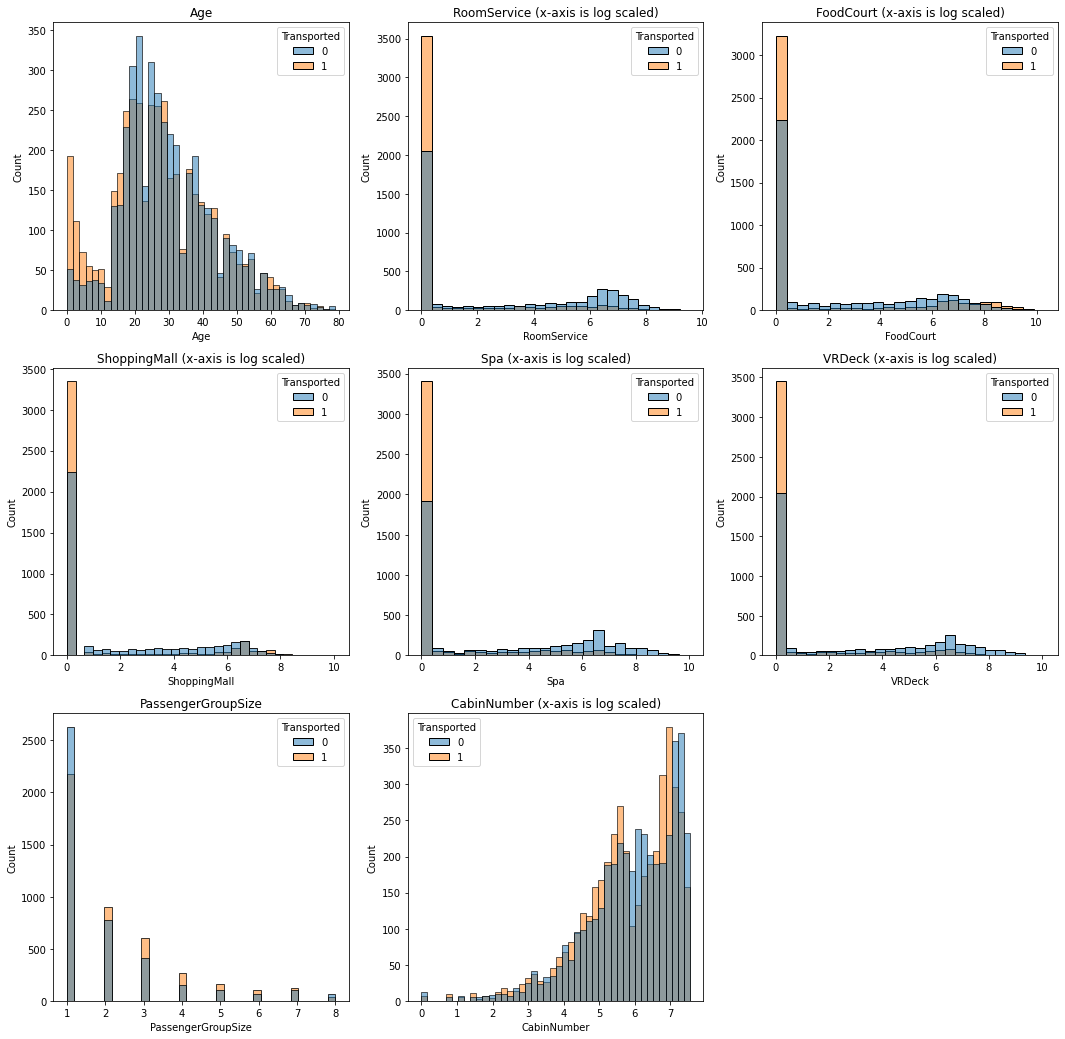

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fig = plt.figure(figsize=(18., 18.))
for i, c in enumerate(continuous_features):
    ax = plt.subplot(3, 3, 1 + i)
    if c in ('Age', 'PassengerNumber', 'PassengerGroupSize'):
        ax = sns.histplot(data=train, x=c, hue='Transported')
        ax.set_title(c)
    else:
        # Age, PassengerNumber, PassengerGroupSize를 제외한 나머지 연속형 변수들은 범위가 매우 커서 로그변환
        ax = sns.histplot(x=np.log1p(train[c]), hue=train['Transported'])
        ax.set_title(f'{c} (x-axis is log scaled)')

In [20]:
# 연속형 변수 간 피어슨 상관계수 계산
train.corr()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,PassengerNumber,PassengerGroupSize,CabinNumber
Age,1.000000,0.068723,0.130421,0.033133,0.123970,0.101007,-0.075026,-0.132756,-0.179102,-0.132255
RoomService,0.068723,1.000000,-0.015889,0.054480,0.010080,-0.019581,-0.244611,-0.022571,-0.040777,-0.008986
FoodCourt,0.130421,-0.015889,1.000000,-0.014228,0.221891,0.227995,0.046566,0.023391,0.032632,-0.183429
ShoppingMall,0.033133,0.054480,-0.014228,1.000000,0.013879,-0.007322,0.010141,-0.038812,-0.038770,0.001727
Spa,0.123970,0.010080,0.221891,0.013879,1.000000,0.153821,-0.221131,0.016820,0.019223,-0.131342
VRDeck,0.101007,-0.019581,0.227995,-0.007322,0.153821,1.000000,-0.207075,0.010082,0.009401,-0.139080
Transported,-0.075026,-0.244611,0.046566,0.010141,-0.221131,-0.207075,1.000000,0.066390,0.082644,-0.045097
PassengerNumber,-0.132756,-0.022571,0.023391,-0.038812,0.016820,0.010082,0.066390,1.000000,0.757107,-0.041735
PassengerGroupSize,-0.179102,-0.040777,0.032632,-0.038770,0.019223,0.009401,0.082644,0.757107,1.000000,-0.049381
CabinNumber,-0.132255,-0.008986,-0.183429,0.001727,-0.131342,-0.139080,-0.045097,-0.041735,-0.049381,1.000000


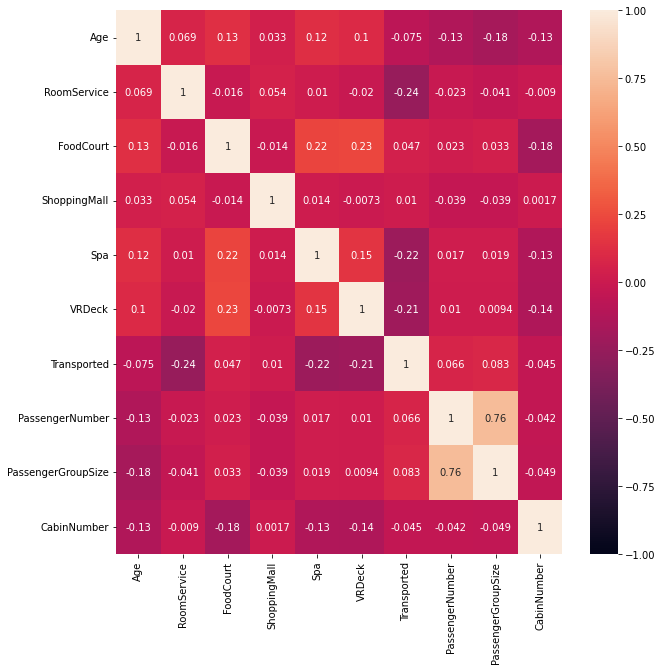

In [21]:
fig = plt.figure(figsize=(10., 10.))
ax = sns.heatmap(train.corr(), vmin=-1., vmax=1., annot=True)

Heatmap까지 그려본 결과 PassengerGroupSize - PassengerNumber 사이에 유의미한 상관계수가 확인

## 범주형 변수

In [22]:
categorical_features = [c for c in train.select_dtypes(exclude='number').columns 
                        if c not in ('Transported', 'Cabin', 'Name', 'PassengerId', 'PassengerGroup')]
                        # Transported(타겟변수), Cabin, PassengerId(여러데이터 혼합), Name, PassengerGroup(무의미한 정보) 등의 이유로 제거
categorical_features

['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'CabinDeck', 'CabinSide']

In [23]:
# 카테고리 사이즈
for feature in categorical_features:
    print(train[feature].value_counts(), '\n')

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64 

False    5439
True     3037
Name: CryoSleep, dtype: int64 

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64 

False    8291
True      199
Name: VIP, dtype: int64 

F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: CabinDeck, dtype: int64 

S    4288
P    4206
Name: CabinSide, dtype: int64 



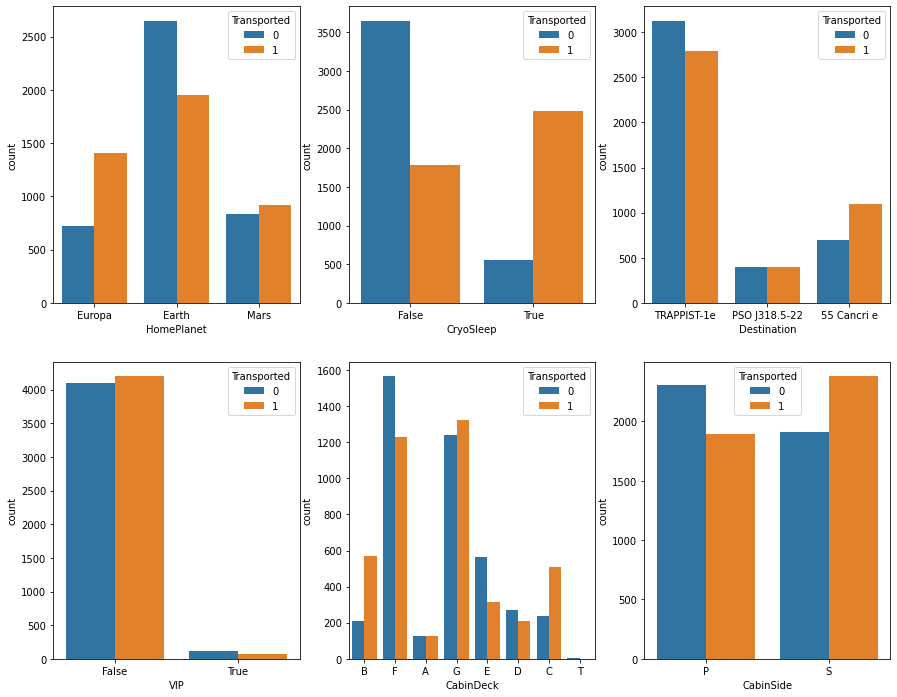

In [24]:
fig = plt.figure(figsize=(15., 12.))
for i, c in enumerate(categorical_features):
    ax = plt.subplot(2, 3, 1 + i)
    ax = sns.countplot(data=train, x=c, hue='Transported')

위의 그래프 결과 Transported 결과에 따라 HomePlanet, CryoSleep, CabinDeck, CabinSide에 차이가 있음을 확인

In [25]:
# 범주형 변수 전처리
features = categorical_features + continuous_features
X = train[features].copy()
X = pd.get_dummies(X, columns = categorical_features, drop_first=True, dummy_na = True)
X_test = test[features].copy()
X_test = pd.get_dummies(X_test, columns = categorical_features, drop_first=True, dummy_na = True)

In [26]:
# 연속형 변수 스케일링
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
X[continuous_features] = StandardScaler().fit_transform(X[continuous_features])    # 표준화
X[continuous_features] = SimpleImputer(strategy='median').fit_transform(X[continuous_features])    # 결측치는 메디안으로 처리
X_test[continuous_features] = StandardScaler().fit_transform(X_test[continuous_features])    
X_test[continuous_features] = SimpleImputer(strategy='median').fit_transform(X_test[continuous_features])

X

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,PassengerGroupSize,CabinNumber,HomePlanet_Europa,HomePlanet_Mars,...,CabinDeck_B,CabinDeck_C,CabinDeck_D,CabinDeck_E,CabinDeck_F,CabinDeck_G,CabinDeck_T,CabinDeck_nan,CabinSide_S,CabinSide_nan
0,0.702095,-0.337025,-0.284274,-0.287317,-0.273736,-0.266098,-0.648735,-1.172966,1,0,...,1,0,0,0,0,0,0,0,0,0
1,-0.333233,-0.173528,-0.278689,-0.245971,0.209267,-0.227692,-0.648735,-1.172966,0,0,...,0,0,0,0,1,0,0,0,1,0
2,2.013510,-0.272527,1.934922,-0.287317,5.634034,-0.223327,-0.022268,-1.172966,1,0,...,0,0,0,0,0,0,0,0,1,0
3,0.287964,-0.337025,0.511931,0.326250,2.655075,-0.097634,-0.022268,-1.172966,1,0,...,0,0,0,0,0,0,0,0,1,0
4,-0.885407,0.117466,-0.240833,-0.037590,0.223344,-0.264352,-0.648735,-1.171013,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.840138,-0.337025,3.947464,-0.287317,1.171754,-0.201506,-0.648735,-0.981499,1,0,...,0,0,0,0,0,0,0,0,0,0
8689,-0.747364,-0.337025,-0.284274,-0.287317,-0.273736,-0.266098,-0.648735,1.755700,0,0,...,0,0,0,0,0,1,0,0,1,0
8690,-0.195189,-0.337025,-0.284274,2.808634,-0.272856,-0.266098,-0.648735,1.757654,0,0,...,0,0,0,0,0,1,0,0,1,0
8691,0.218942,-0.337025,0.366715,-0.287317,0.036829,2.557627,-0.022268,0.014912,1,0,...,0,0,0,1,0,0,0,0,1,0


## 차원축소

In [27]:
from sklearn.decomposition import PCA, KernelPCA, FastICA
from sklearn.manifold import TSNE
from umap import UMAP

/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


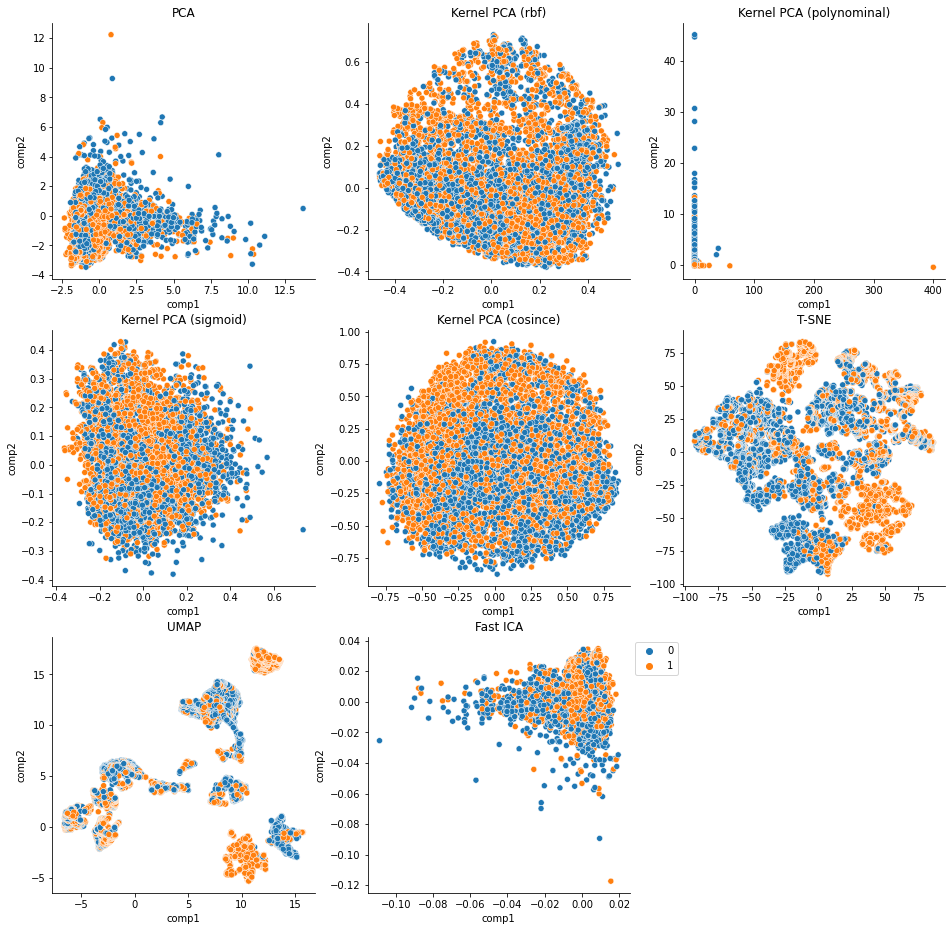

In [28]:
fig = plt.figure(figsize=(16., 16.))
dimension_reduce_models ={
    'PCA': PCA(n_components=2, random_state=2022),
    'Kernel PCA (rbf)': KernelPCA(n_components=2, kernel='rbf', n_jobs=-1, random_state=2022),
    'Kernel PCA (polynominal)': KernelPCA(n_components=2, kernel='poly', n_jobs=-1, random_state=2022),
    'Kernel PCA (sigmoid)': KernelPCA(n_components=2, kernel='sigmoid', n_jobs=-1, random_state=2022),
    'Kernel PCA (cosince)': KernelPCA(n_components=2, kernel='cosine', n_jobs=-1, random_state=2022),
    'T-SNE': TSNE(n_components=2, random_state=2022),
    'UMAP': UMAP(n_components=2, random_state=2022, n_jobs=-1),
    'Fast ICA': FastICA(n_components=2, random_state=2022)
}

for i, (name, model) in enumerate(dimension_reduce_models.items()):
    ax = plt.subplot(3, 3, 1 + i)
    X_reduced = model.fit_transform(X.copy())
    X_reduced = pd.DataFrame(data=X_reduced, columns=['comp1', 'comp2'])
    X_reduced['Transported'] = train['Transported']
    ax = sns.scatterplot(data=X_reduced, x='comp1', y='comp2', hue='Transported')
    ax.set_title(name)
    if i == 7:  # last
        ax.legend(loc='upper left', bbox_to_anchor=[1., 1.])
    else:
        ax.legend_ = None
    sns.despine()

T-SNE 또는 UMAP이 괜찮아 보임.

<Figure size 1152x1152 with 0 Axes>

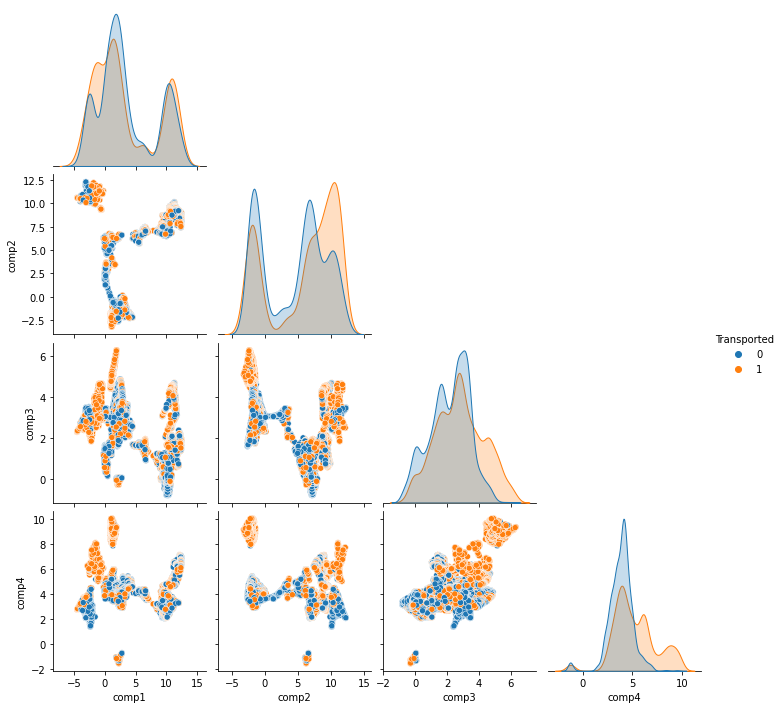

In [29]:
# UMAP의 n_components를 2에서 4로 올린 후 다시 시각화
fig = plt.figure(figsize=(16., 16.))
X_reduced_umap = UMAP(n_components = 4, random_state=2022, n_jobs=-1).fit_transform(X.copy())
X_reduced_umap = pd.DataFrame(X_reduced_umap, columns=[f'comp{i + 1}' for i in range(4)])
X_reduced_umap['Transported'] = train['Transported']
sns.pairplot(data=X_reduced_umap, corner=True, hue='Transported')

# 3. 모델링

## 데이터 분할

In [30]:
from sklearn.model_selection import train_test_split
y = train['Transported']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=2022, stratify=y)

각 알고리즘 별 성능을 비교하기위해 빈 딕셔너리 생성

In [31]:
model_dict = {}

## NaiveBayes

In [32]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

clf_nb = GaussianNB()
clf_nb.fit(X_train, y_train)
y_pred_nb = clf_nb.predict(X_val)
accuracy_nb = accuracy_score(y_pred_nb, y_val)
model_dict['Naive_Bayes'] = accuracy_nb
print(accuracy_nb)

0.7228292121909143


## Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression(random_state=42)
clf_lr.fit(X_train, y_train)
y_pred_lr = clf_lr.predict(X_val)
accuracy_lr = accuracy_score(y_pred_lr, y_val)
model_dict['Logistic_Regression'] = accuracy_lr
print(accuracy_lr)

0.7952846463484762


## Support Vector Machine

In [34]:
from sklearn.svm import SVC

clf_svm = SVC(random_state=42)
clf_svm.fit(X_train, y_train)
y_pred_svm = clf_svm.predict(X_val)
accuracy_svm = accuracy_score(y_pred_svm, y_val)
model_dict['SVM'] = accuracy_svm
print(accuracy_svm)

0.8085106382978723


## KNN

In [35]:
from sklearn.neighbors import KNeighborsClassifier

clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train, y_train)
y_pred_knn = clf_knn.predict(X_val)
accuracy_knn = accuracy_score(y_pred_knn, y_val)
model_dict['KNN'] = accuracy_knn
print(accuracy_knn)

0.7849338700402531


## SGD Classifier

In [36]:
from sklearn.linear_model import SGDClassifier

clf_sgd = SGDClassifier(random_state=42)
clf_sgd.fit(X_train, y_train)
y_pred_sgd = clf_sgd.predict(X_val)
accuracy_sgd = accuracy_score(y_pred_sgd, y_val)
model_dict['SGD'] = accuracy_sgd
print(accuracy_sgd)

0.7906843013225991


## Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(random_state=42)
clf_rf.fit(X_train, y_train)
y_pred_rf = clf_rf.predict(X_val)
accuracy_rf = accuracy_score(y_pred_rf, y_val)
model_dict['Random_Forest'] = accuracy_rf
print(accuracy_rf)

0.7964347326049454


## Gradient Boosting Classifier

In [38]:
from sklearn.ensemble import GradientBoostingClassifier

clf_gbc = GradientBoostingClassifier(random_state=42)
clf_gbc.fit(X_train, y_train)
y_pred_gbc = clf_gbc.predict(X_val)
accuracy_gbc = accuracy_score(y_pred_gbc, y_val)
model_dict['Gradient_Boosting_Classifier'] = accuracy_gbc
print(accuracy_gbc)

0.8039102932719954


## XGBOOST

In [39]:
from xgboost import XGBClassifier

clf_xgb = XGBClassifier(random_state=42, eval_metric='logloss')
clf_xgb.fit(X_train, y_train)
y_pred_xgb = clf_xgb.predict(X_val)
accuracy_xgb = accuracy_score(y_pred_xgb, y_val)
model_dict['XGBoost'] = accuracy_xgb
print(accuracy_xgb)

0.8033352501437608


## AdaBoost

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

clf_dt = DecisionTreeClassifier(criterion = 'entropy', random_state=42)
clf_ada = AdaBoostClassifier(clf_dt, random_state=42)
clf_ada.fit(X_train, y_train)
y_pred_ada = clf_ada.predict(X_val)
accuracy_ada = accuracy_score(y_pred_ada, y_val)
model_dict['AdaBoost'] = accuracy_ada
print(accuracy_ada)

0.7711328349626222


## LGBM

In [41]:
from lightgbm import LGBMClassifier

clf_lgbm = LGBMClassifier(random_state=42)
clf_lgbm.fit(X_train, y_train)
y_pred_lgbm = clf_lgbm.predict(X_val)
accuracy_lgbm = accuracy_score(y_pred_lgbm, y_val)
model_dict['LightGBM'] = accuracy_lgbm
print(accuracy_lgbm)

0.8108108108108109


In [42]:
# 모델별 정확도 순위
import operator
 
sdict = sorted(model_dict.items(), key=operator.itemgetter(1))

In [43]:
sdict

[('Naive_Bayes', 0.7228292121909143),
 ('AdaBoost', 0.7711328349626222),
 ('KNN', 0.7849338700402531),
 ('SGD', 0.7906843013225991),
 ('Logistic_Regression', 0.7952846463484762),
 ('Random_Forest', 0.7964347326049454),
 ('XGBoost', 0.8033352501437608),
 ('Gradient_Boosting_Classifier', 0.8039102932719954),
 ('SVM', 0.8085106382978723),
 ('LightGBM', 0.8108108108108109)]

LGBM, SVM, GBD 등의 순서로 성능이 좋았음

## 하이퍼파라미터 튜닝(성능 상위 3개 모델에 대해 진행)

In [44]:
# LGBM
from sklearn.model_selection import GridSearchCV
gs_model_dict = {}


parameters_lgbm = {
    'learning_rate':[0.1, 0.085, 0.05, 0.02],
    'n_estimators':[110,100,90],
    'min_child_samples': [25, 30, 40, 50],
    'num_leaves': [31, 34, 37, 40, 43]
}

clf_lgbm = GridSearchCV(LGBMClassifier(random_state=42, max_depth=8, subsample=0.6), parameters_lgbm)
clf_lgbm.fit(X_train, y_train)
y_pred_lgbm = clf_lgbm.predict(X_val)
accuracy_lgbm = accuracy_score(y_val, y_pred_lgbm)
gs_model_dict['LightGBM'] = accuracy_lgbm
print(accuracy_lgbm)

0.8154111558366878


In [45]:
# SVM
parameters_svm = {
    'C':[1.5],
    'kernel':['rbf']}
clf_svm = GridSearchCV(SVC(random_state=42), parameters_svm)
clf_svm.fit(X_train, y_train)
y_pred_svm = clf_svm.predict(X_val)
accuracy_svm = accuracy_score(y_val, y_pred_svm)
gs_model_dict['SVM'] = accuracy_svm
print(accuracy_svm)

0.8125359401955147


In [46]:
# GBD
parameters_gbc = {
    'learning_rate': [0.1,0.125, 0.075],
    'n_estimators': [100, 105, 110],
    'max_depth': [3, 4, 5, 6, 7]
}

clf_gbc = GridSearchCV(GradientBoostingClassifier(random_state=42), parameters_gbc)
clf_gbc.fit(X_train, y_train)
y_pred_gbc = clf_gbc.predict(X_val)
accuracy_gbc = accuracy_score(y_val, y_pred_gbc)
gs_model_dict['Gradient_Boosting_Classifier'] = accuracy_gbc
print(accuracy_gbc)

0.8102357676825762


## 최종 Voting Classifier

In [47]:
from sklearn.ensemble import VotingClassifier

voting_ensemble = VotingClassifier(estimators= 
                                   [('LGBM', clf_lgbm),
                                    ('SVM', clf_svm),
                                    ('GBC', clf_gbc)],
                              voting = 'hard')

clf_final = voting_ensemble.fit(X_train, y_train)
y_pred = clf_final.predict(X_val)
accuracy_score(y_val, y_pred)

0.8177113283496262

In [48]:
from sklearn.metrics import f1_score, confusion_matrix
print("Performance on validation data:", f1_score(y_val, y_pred, average='micro'))

cm = confusion_matrix(y_val, y_pred) 
print ("Confusion Matrix : \n", cm)

Performance on validation data: 0.8177113283496262
Confusion Matrix : 
 [[711 152]
 [165 711]]


# 4. 최종 제출

In [49]:
submission = clf_final.predict(X_test)

data = {
    'PassengerId': np.array(test['PassengerId']).reshape(len(test['PassengerId'])),
    'Transported': np.array(submission).astype('bool')
}

submission_df = pd.DataFrame(data=data).reset_index()
submission_df.drop(columns=['index'], inplace=True, axis=1)
submission_df.to_csv("/kaggle/working/submission.csv", index=False)

스코어 0.80289 기록